# An Analysis of Rental Prices of Apartments in Texas
### Members:
    Mohammed Touseef Ansari
    Jerry Nguyen
    Cadence Parker
    Nadia Nafeesa Binti Rashid

### Introduction:
As first year students living on residence, we are fortunate to not think about our commute, cooking, and therefore be able to focus on the task at hands and that is studying. However, as our finals are approaching, we are faced with the imminent need to find housing. Therefore, we are inspired to assess the following dataset, taken from **UC Irvine Machine Leaning Repository**:https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

This dataset contains 10,000 obersvations in 2019 of listed rentals, mainly apartments, across the US and the city it is located in. The following variables includes:
- `id = unique identifier of apartment`
- `category = category of classified`
- `title = title text of apartment`
- `body = body text of apartment`
- `amenities = like AC, basketball,cable, gym, internet access, pool, refrigerator etc`
- `bathrooms = number of bathrooms`
- `bedrooms = number of bedrooms`
- `currency = price in current`
- `fee = fee`
- `has_photo = photo of apartment`
- `pets_allowed = what pets are allowed dogs/cats etc.`
- `price = rental price of apartment`
- `price_display = price converted into display for reader`
- `price_type = price in USD`
- `square_feet = size of the apartment`
- `address =  where the apartment is located`
- `cityname =  where the apartment is located`
- `state =  where the apartment is located`
- `latitude = where the apartment is located`
- `longitude = where the apartment is located`
- `source = origin of classified`
- `time = when classified was created`

We will use this dataset to predict the average price of a rental based on their size and try to answer this question:
- **What are the monthly rental prices for a certain size of apartment in Texas? And how accurately does this correlation apply to other cities in Texas?**

The reason we would use Texas is because through our time exploring the data, we found that Texas has the highest count of rentals in the dataset.

In [18]:
library(tidyverse)
library(repr)
library(tidymodels)

In [19]:
apartments<- read_csv2("data/apartments_for_rent_classified_10K.csv")
head(apartments)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 10000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (18): category, title, body, amenities, bathrooms, bedrooms, currency, f...
dbl  (4): id, price, square_feet, time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,⋯,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",null,null,0,USD,No,Thumbnail,⋯,$790,Monthly,101,null,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",null,null,1,USD,No,Thumbnail,⋯,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",null,1,0,USD,No,Thumbnail,⋯,"$1,390",Monthly,107,null,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle, 98122, WAMonthly rental rates range from $925We have studio units available for rent",null,1,0,USD,No,Thumbnail,⋯,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",null,null,0,USD,No,Thumbnail,⋯,$880,Monthly,125,null,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
5667891676,housing/rent/apartment,0 BR in New York NY 10019,"**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVAILABLE IMMEDIATELY** $2475 RENT IS NET EFFECTIVE WITH one month FREE ON $2700 Monthly rent***Low Fee*UNFURNISHED Spacious and Sunny Southern facing studio (403 sq-ft) with big private terrace (130 sq. feet) basks in natural sunlight all day long, facing the scenic landscaped and peaceful residents ct. yard. The apartment features hard wood floors throughout, a carousel kitchen with new appliances and two big closets. Laundry on floor steps away.Worldwide Plaza is a full-service condo that pampers its residents with concierge and 24-hr attendant at door services, a live-in resident manager, a scenic landscaped court yard and lounge, valet service, 8 laundry rooms (washer and dryers are permitted within the residences), on-site garage and a separate full-service health club (NYSC ELITE) equipped with a 25 meter salt water pool, immersive VR spin cycling room, sauna, steam room, etc.","Dishwasher,Elevator,Patio/Deck,Pool,Storage",1,0,USD,No,Thumbnail,⋯,"$2,475",Monthly,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784


This is our dataset. From here, we can see that there are alot of unnecessary variable that does not contribute directly into our analysis, therefore we must address them and filter them out. Next, we would like to only filter for the column "price_type" and only choose rows where the type is "Monthly".

In [20]:
apt_read <- apartments|>
            group_by(price_type)|>
            summarize(count =n())

apt_read

price_type,count
<chr>,<int>
Monthly,9998
Monthly|Weekly,1
Weekly,1


In [21]:
apt_read <- apartments|>
            group_by(source)|>
            summarize(count =n())

apt_wrangled <- apartments |>
                filter(bathrooms != 'null')|>
                filter(bedrooms != 'null')|>
                filter(price_type == "Monthly")|>
                mutate(bathrooms = as.double(bathrooms))|>
                mutate(bedrooms = as.double(bedrooms))|>
                mutate(category = as.factor(category))|>
                mutate(category = fct_recode(category,
                                            'Apartment' = 'housing/rent/apartment',
                                            'Home' = 'housing/rent/home',
                                            'Short Term' = 'housing/rent/short_term'))|>
                mutate(time = as.POSIXct(time, origin="1970-01-01"))|>
                select(-latitude,- longitude, -pets_allowed, -price_display, -address, -title, -body, -fee, -has_photo)


              


apt_top_state <-  apt_wrangled |>
            group_by (state)|>
            summarize(count = n())|>
            arrange(desc(count))|>
            slice(0:1)

apt_texas_topcities <- apt_wrangled |>
                    filter(state %in% apt_top_state)|>
                    group_by(state, cityname)|>
                    summarize(count = n())|>
                    arrange(desc(count)) |>
                    slice(0:4)

apt_top_state
apt_texas_topcities
glimpse(apt_wrangled)


`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state,count
<chr>,<int>
TX,1730


state,cityname,count
<chr>,<chr>,<int>
TX,Austin,522
TX,Dallas,199
TX,Houston,186
TX,San Antonio,182


Rows: 9,959
Columns: 13
$ id          <dbl> 5668626833, 5659918074, 5667891676, 5668610290, 5664571820…
$ category    <fct> Apartment, Apartment, Apartment, Apartment, Apartment, Apa…
$ amenities   <chr> "null", "null", "Dishwasher,Elevator,Patio/Deck,Pool,Stora…
$ bathrooms   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ bedrooms    <dbl> 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ currency    <chr> "USD", "USD", "USD", "USD", "USD", "USD", "USD", "USD", "U…
$ price       <dbl> 1390, 925, 2475, 1495, 1695, 1560, 1000, 950, 625, 600, 54…
$ price_type  <chr> "Monthly", "Monthly", "Monthly", "Monthly", "Monthly", "Mo…
$ square_feet <dbl> 107, 116, 130, 138, 190, 200, 200, 200, 200, 200, 200, 200…
$ cityname    <chr> "Arlington", "Seattle", "Manhattan", "San Francisco", "San…
$ state       <chr> "VA", "WA", "NY", "CA", "CA", "NC", "TX", "CA", "GA", "NC"…
$ source      <chr> "RentLingo", "RentLingo", "Listanza", "RentLingo", "RentLi…
$ time        <d

From here we see that Texas has the highest count of rental properties, and that the top 4 urban cities are Austin, Dallas, Houston and San Antonio. These are all urban cities with similar socio-economic backgrounds and as such we will perform our analysis using all these cities together. 

In [22]:
#FILTERING OUR CLEANED DATA FOR THE ABOVE CITIES

apt_texas_cities <- apt_wrangled |>
                    filter(cityname %in% pull(apt_texas_topcities,cityname))

apt_texas_cities
                

id,category,amenities,bathrooms,bedrooms,currency,price,price_type,square_feet,cityname,state,source,time
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dttm>
5668624702,Apartment,Pool,1,1,USD,705,Monthly,250,Houston,TX,RentLingo,2019-12-26 11:21:00
5668622362,Apartment,Pool,1,1,USD,700,Monthly,250,Austin,TX,RentLingo,2019-12-26 11:18:37
5664574886,Apartment,null,1,1,USD,675,Monthly,250,Houston,TX,RentLingo,2019-12-22 11:48:48
5664569086,Apartment,null,1,1,USD,650,Monthly,250,San Antonio,TX,RentLingo,2019-12-22 11:41:59
5664597909,Apartment,null,1,0,USD,900,Monthly,300,Austin,TX,RentLingo,2019-12-22 12:18:46
5668632154,Apartment,null,1,2,USD,1386,Monthly,334,Austin,TX,RentLingo,2019-12-26 11:30:10
5668629766,Apartment,null,1,2,USD,809,Monthly,337,Austin,TX,RentLingo,2019-12-26 11:27:25
5664594444,Apartment,null,1,0,USD,875,Monthly,350,Austin,TX,RentLingo,2019-12-22 12:13:42
5668631012,Apartment,null,1,2,USD,1246,Monthly,352,Austin,TX,RentLingo,2019-12-26 11:28:51


In [23]:
set.seed(2) 
#DO NOT REMOVE THE ABOVE!
apt_split <- initial_split(apt_texas_cities, prop = 0.75, strata = price)  
apt_train <- training(apt_split)   
apt_test <- testing(apt_split)

glimpse(apt_train)

Rows: 827
Columns: 13
$ id          <dbl> 5668624702, 5668622362, 5664574886, 5668629766, 5664594444…
$ category    <fct> Apartment, Apartment, Apartment, Apartment, Apartment, Apa…
$ amenities   <chr> "Pool", "Pool", "null", "null", "null", "null", "null", "n…
$ bathrooms   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ bedrooms    <dbl> 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2…
$ currency    <chr> "USD", "USD", "USD", "USD", "USD", "USD", "USD", "USD", "U…
$ price       <dbl> 705, 700, 675, 809, 875, 850, 875, 900, 900, 895, 895, 895…
$ price_type  <chr> "Monthly", "Monthly", "Monthly", "Monthly", "Monthly", "Mo…
$ square_feet <dbl> 250, 250, 250, 337, 350, 360, 398, 400, 400, 400, 400, 400…
$ cityname    <chr> "Houston", "Austin", "Houston", "Austin", "Austin", "Austi…
$ state       <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX"…
$ source      <chr> "RentLingo", "RentLingo", "RentLingo", "RentLingo", "RentL…
$ time        <dtt

In [24]:
summary_table <- apt_train |>
  group_by(source) |>
  summarize(
    num_observations = n(),
    mean_bathrooms = mean(bathrooms, na.rm = TRUE),
    mean_bedrooms = mean(bedrooms, na.rm = TRUE),
    mean_square_feet = mean(square_feet, na.rm = TRUE),
    mean_price = mean(price, na.rm = TRUE))
  
summary_table

source,num_observations,mean_bathrooms,mean_bedrooms,mean_square_feet,mean_price
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GoSection8,1,2.000000,3.000000,1313.0000,1112.000
Listanza,2,1.500000,1.500000,1065.0000,1782.000
RENTOCULAR,1,2.000000,2.000000,1195.0000,1850.000
RentDigs.com,77,1.305195,1.415584,822.0909,1167.091
RentLingo,746,1.110590,1.290885,724.3485,1158.212


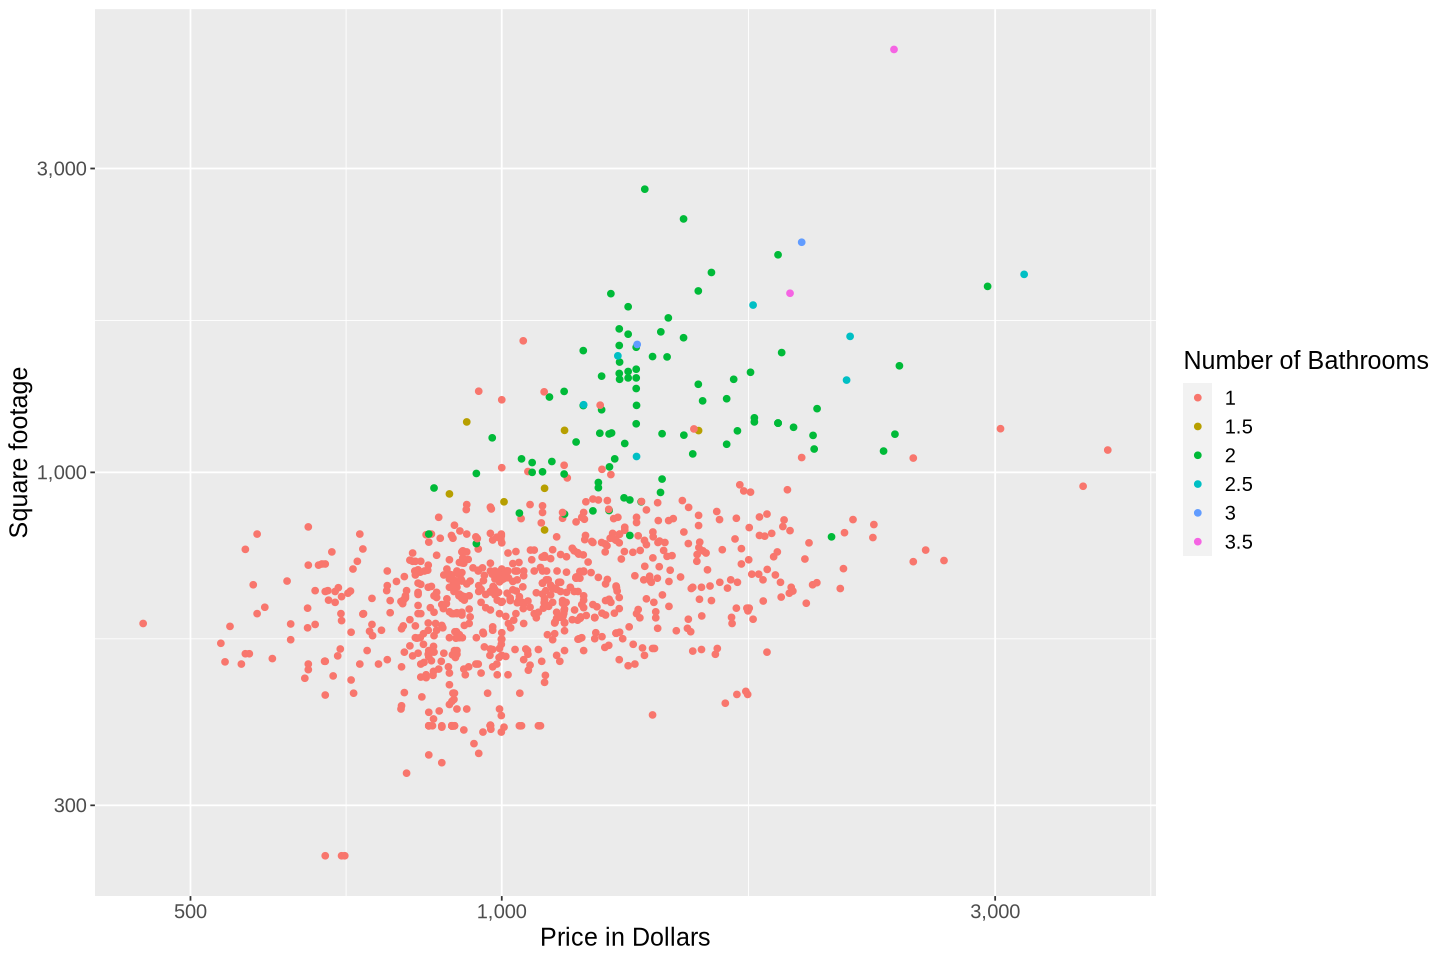

In [25]:
options(repr.plot.width = 12, repr.plot.height = 8) 
price_vs_area <- apt_train |>
                ggplot(aes(x = price, y = square_feet))+
                geom_point(aes(color = as_factor(bathrooms)))+
                labs(x = "Price in Dollars", y = "Square footage", color = "Number of Bathrooms") +
                scale_x_log10(labels = label_comma()) +
                scale_y_log10(labels = label_comma())+
                theme(text = element_text(size = 15))

price_vs_area


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 3 rows containing missing values (`geom_bar()`).”


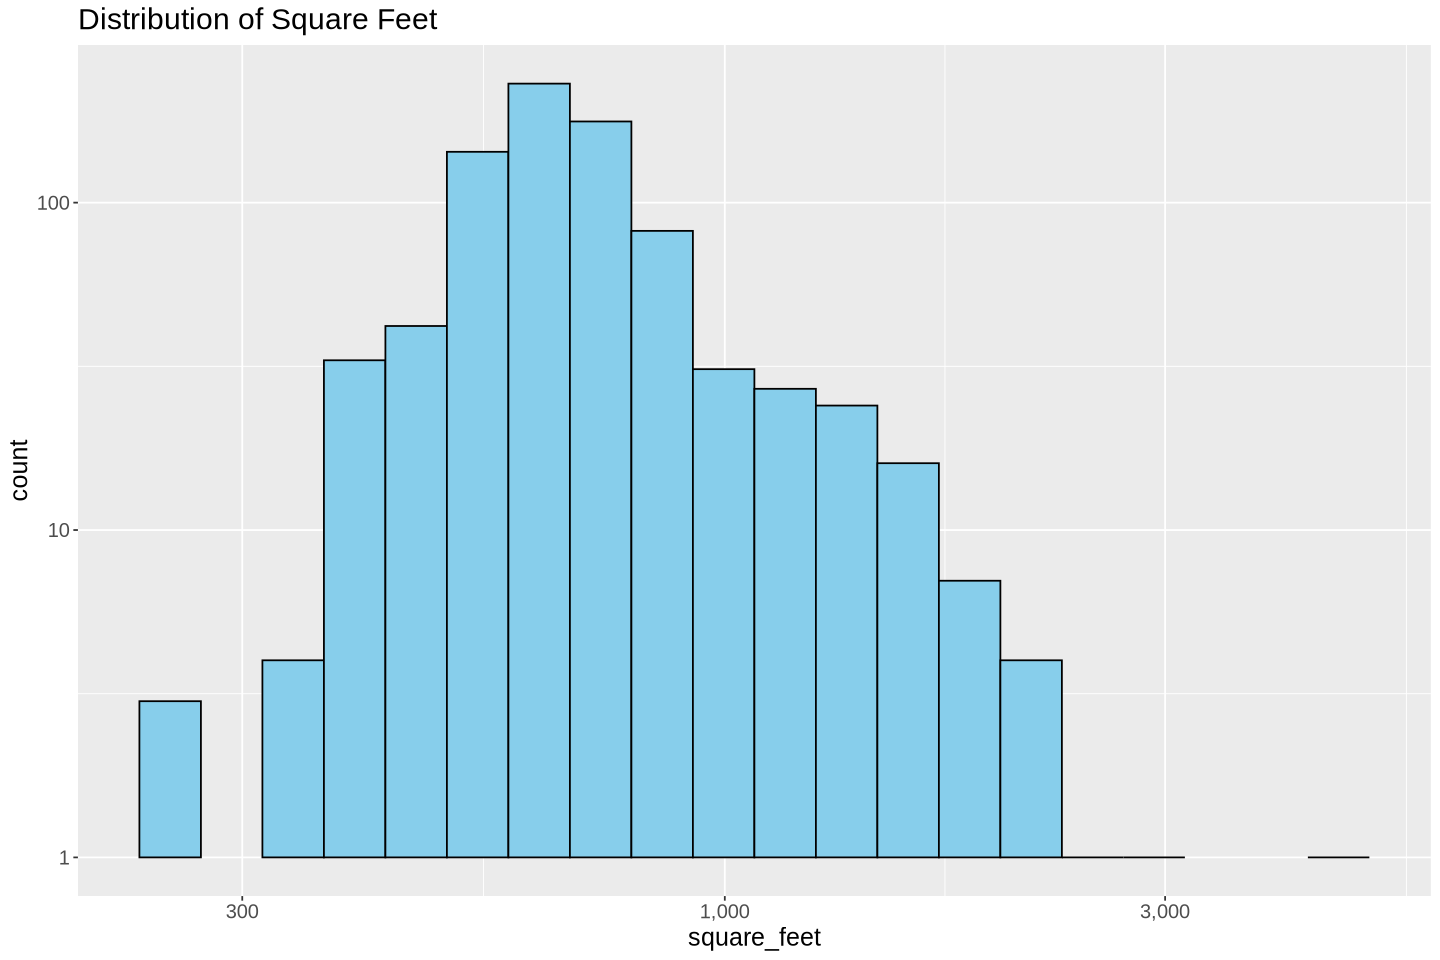

In [26]:
square_footage_dist <- ggplot(data = apt_train) +
  geom_histogram(mapping = aes(x = square_feet), bins = 20, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Square Feet")+
     scale_x_log10(labels = label_comma()) +
                scale_y_log10(labels = label_comma())+
                theme(text = element_text(size = 15))


square_footage_dist

### Methods:
For our data analysis, we will first isolate the column of the state of Texas. This is because, through our preliminary analysis, Texas has the highest count of apartments and therefore would yield more data to analyze. Additionally,  because each state would have different economic situations that could potentially play a role in influencing the prices of rentals. We would want to eliminate this as it would affect our results. 

As we are doing regression, we will use the variable of “square_feet” as a predictor for the variable “price” of our rental. Therefore our main column/variable will be “state” as well as “price” and “square_feet” to conduct our data analysis. Please note the variable ”state” will be there mainly just to identify our table only includes the state of Texas. 

We will use the process of the KNN-regression algorithm with our variable of square_feet  to predict the prices of the rental. The process of setting the model, recipe, workflow and finding the lowest RMSE for our neighbour will be used.

As for our follow-up question to apply the trend that we found in the 3 cities that has the highest amount of properties form the dataset in Texas. This will include Austin, Dallas and Houston. Therefore to do this, we will create a table same as above however will filter out for each named city. Thus our 3 tables should each have the column of “cityname” as well as “price” and “square_feet”. Same as above, the variable “cityname” is only for identification purposes.

We will conduct our analysis through regression just like when we are doing it for the entire state but this time will do it 3 times for the corresponding 3 cities.

There are 2 ways that we can visualize our results. 
- The first way is to plot the variable of square_feet and price on the axis as a scatter plot and then we can use our KNN classifier and project a line which denotes the accuracy of our classifier. We can do the same thing with our 3 other plots of Austin, Dallas and Houston.
- Our second way built on from the first one however with this, we can visualize it by additionally coloring in the data of the scatter plot to show which properties has how much bedroom and/or bathroom. This will lead to more questions and understanding the relationship if these variables plays a role in affecting the price of rentals.
